In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

#redicting Customer Churn using Classification Models
#Objective: Build and compare multiple classification models to predict if a customer will churn.
#Dataset: A telco dataset containing customer demographics, usage data, and churn labels.
#Tasks:
#Load and preprocess the data (handle missing values, encode categorical variables, and normalise features).
#Perform exploratory data analysis (EDA) to identify key factors influencing churn.
#Train and compare classification models: Logistic Regression, Decision Tree, and Random Forest.
#Perform hyperparameter tuning using GridSearchCV.
#Evaluate models using precision, recall, F1-score, and AUC-ROC curve.

In [9]:
Url = "https://raw.githubusercontent.com/OmarMohy/Telco-Customer-Churn-Analysis/main/Telco-Customer-Churn.csv"

df = pd.read_csv(Url)

In [10]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df = df.dropna()

In [13]:
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    if column != 'Churn':  # Avoid transforming the target variable yet
        df[column] = label_encoder.fit_transform(df[column])
        
    

In [14]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [15]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
churn_rate = df['Churn'].mean()
print(f"Churn Rate: {churn_rate:.2f}")

Churn Rate: 0.27


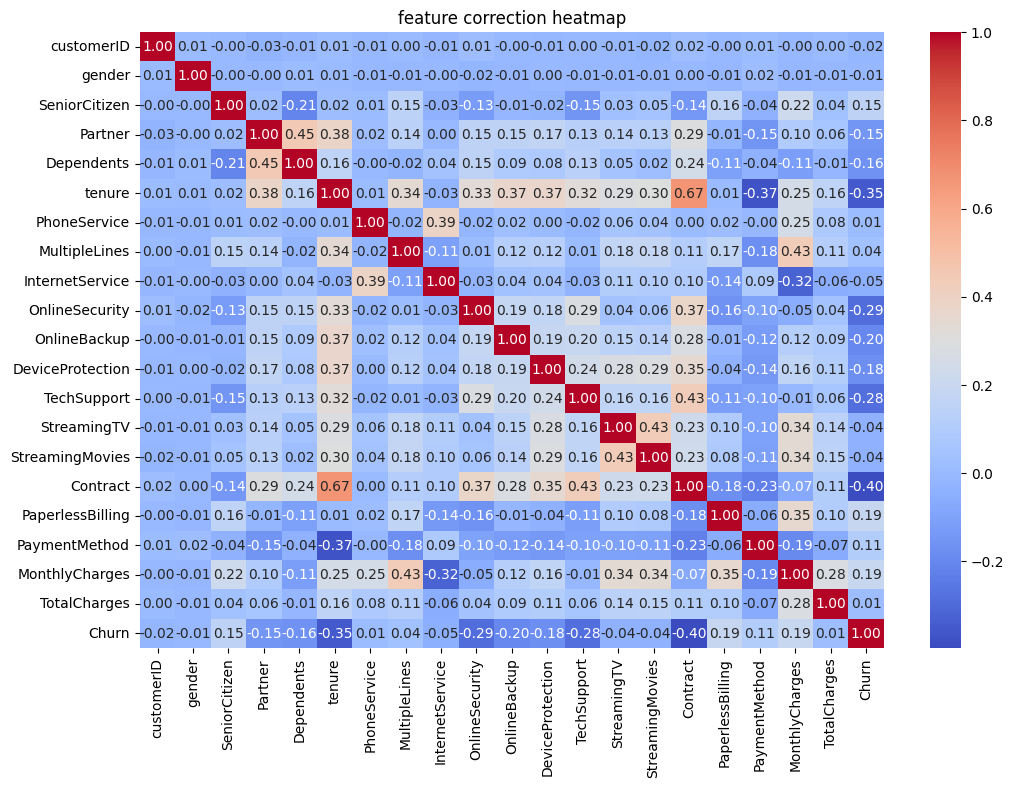

In [20]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = ('coolwarm'))
plt.title('feature correction heatmap')
plt.show()

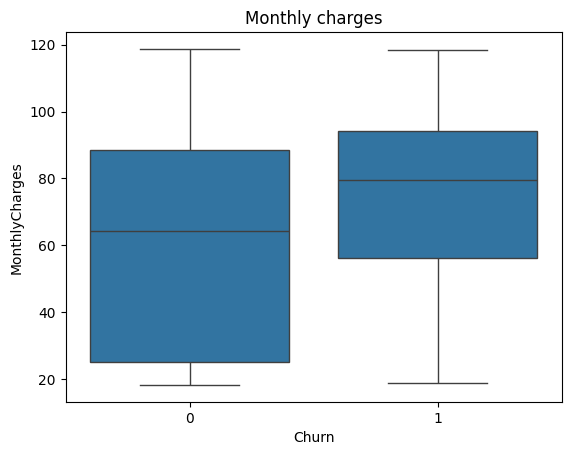

In [21]:
sns.boxplot(data = df, x = 'Churn', y = 'MonthlyCharges')
plt.title('Monthly charges')
plt.show()

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

In [32]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

In [33]:
dec_tree = DecisionTreeClassifier(random_state = 42)
dec_tree.fit(X_train, y_train)#
y_pred_dec_tree = dec_tree.predict(X_test)

In [34]:
rand_forest = RandomForestClassifier(random_state = 42)
rand_forest.fit(X_train, y_train)
y_pred_rand_forest = rand_forest.predict(X_test)

In [35]:
models = {
    "Logistic Regression":(log_reg, y_pred_log_reg),
    "Desicion Tree":(dec_tree, y_pred_dec_tree),
    "Random forest":(rand_forest, y_pred_rand_forest),
}
for model_name, (models, y_pred) in models.items():
    print(f"model: {model_name}")
    print(classification_report(y_test, y_pred))
    print(f"AUC-ROC: {roc_auc_score(y_test, models.predict_proba(X_test)[:, 1]):.2f}\n")

model: Logistic Regression
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1539
           1       0.68      0.55      0.61       574

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113

AUC-ROC: 0.86

model: Desicion Tree
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1539
           1       0.51      0.52      0.52       574

    accuracy                           0.74      2113
   macro avg       0.67      0.67      0.67      2113
weighted avg       0.74      0.74      0.74      2113

AUC-ROC: 0.67

model: Random forest
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.68      0.50      0.57       574

    accuracy                           0.80      2113
   macro avg       0.75      

In [56]:
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import numpy as np

print(y_train.value_counts())
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(type(y_train_resampled))
if not isinstance(X_train_resampled, (pd.DataFrame, np.ndarray)):
    X_train_resampled = np.array(X_train_resampled)
if not isinstance(y_train_resampled, (pd.Series, np.ndarray)):
    y_train_resampled = np.array(y_train_resampled)

Churn
0    3635
1    1295
Name: count, dtype: int64
<class 'pandas.core.series.Series'>


In [57]:
parameter = {
    'n_estimators':[50, 100, 150],
    'max_depth':[None, 10, 20],
    'min_sample_split':[2, 5 ,10],
    'min_sample_leaf':[1,2,4],
}


In [58]:
gridsearch = GridSearchCV(estimator = RandomForestClassifier(random_state = 42), 
                         param_grid = parameter,
                          cv = 3,
                          scoring = 'roc_auc', verbose = 2)
gridsearch.fit(X_train_resampled, y_train_resampled)
print(gridsearch.best_params_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits


ValueError: Invalid parameter 'min_sample_leaf' for estimator RandomForestClassifier(random_state=42). Valid parameters are: ['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'monotonic_cst', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'].

In [48]:
best_model = gridsearch.best_estimator_
print("best parameter = ", gridsearch.best_params_)
y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))
print(f"AUC-ROC: {roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]):.2f}\n")

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [ ]:
plt.figure(figuresize = (10, 6))
for model_name, (model, _) in models.items():
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    plt.plot(fpr, tpr, label = f'{model_name}(auc = {roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1]):.2f})')